In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [36]:
WM = pd.read_csv("WM.csv")
K = pd.read_csv("k.csv")
NVR = pd.read_csv("NVR.csv")
PHM = pd.read_csv("PHM.csv")
HII = pd.read_csv("HII.csv")

# HII.head()
WM.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2021-01-04,109.491,109.556,106.021,106.550,1731000,0.0,0.0
1,2021-01-05,106.253,107.097,105.826,106.902,1336100,0.0,0.0
2,2021-01-06,107.450,109.900,106.902,109.269,1617800,0.0,0.0
3,2021-01-07,109.027,109.853,108.452,109.538,1827600,0.0,0.0
4,2021-01-08,109.853,110.373,108.777,110.048,1372700,0.0,0.0


In [37]:
firms = {
    "WM": WM,
    "K": K,
    "NVR": NVR,
    "PHM": PHM,
    "HII": HII
}





In [38]:
for ticker, df in firms.items():
    df["Ticker"] = ticker


In [39]:
for df in firms.values():
    df["Date"] = pd.to_datetime(df["Date"])




In [40]:
# df.head(10)
df.tail()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Ticker
999,2024-12-23,186.668,190.034,185.078,186.874,606800,0.0,0.0,HII
1000,2024-12-24,186.471,188.895,186.275,188.886,142000,0.0,0.0,HII
1001,2024-12-26,188.542,190.731,188.120,188.267,359500,0.0,0.0,HII
1002,2024-12-27,187.011,188.837,185.578,186.884,332400,0.0,0.0,HII
1003,2024-12-30,184.764,186.756,182.899,184.911,366100,0.0,0.0,HII


In [41]:
# 2 pt) Is there a company that has no difference between the High and Low columns
# for any trading day? What does it mean for the stock’s trading behavior on such
# days?

In [42]:
for ticker, df in firms.items():
    zero_range = df[df["High"] - df["Low"] == 0]

    if len(zero_range) > 0:
        print(f"Company {ticker} has days where High == Low:")
        display(zero_range[["Date", "High", "Low"]])
    else:
        print(f"Company {ticker} has NO days with High == Low.")





Company WM has NO days with High == Low.
Company K has NO days with High == Low.
Company NVR has NO days with High == Low.
Company PHM has NO days with High == Low.
Company HII has NO days with High == Low.


In [43]:

#  (1 pt) What is the highest and lowest price price each company recorded? Hint:
# Select the column(s) that can contain the maximum and minimum price wisely

for name, df in firms.items():
    high = df["Close"].max()
    low = df["Close"].min()
    print(f"{name}: Highest price = {high:.2f}, Lowest price = {low:.2f}")




WM: Highest price = 225.22, Lowest price = 101.99
K: Highest price = 79.47, Lowest price = 45.33
NVR: Highest price = 9924.40, Lowest price = 3670.00
PHM: Highest price = 147.88, Lowest price = 35.21
HII: Highest price = 286.14, Lowest price = 141.17


In [75]:
# 1 pt) Calculate logarithmic returns from Close. For each company, report min,
# max, mean, standard deviation, and skewness of returns

for name, df in firms.items():
    df["log_return"] = np.log(df["Close"]) - np.log(df["Close"].shift(1))

    stats = df["log_return"].agg(["min", "max", "mean", "std", "skew"])
    print(f"\n{name} Log Return Stats:")
    print(stats)





WM Log Return Stats:
min    -0.083727
max     0.059261
mean    0.000628
std     0.011457
skew   -0.318891
Name: log_return, dtype: float64

K Log Return Stats:
min    -0.086880
max     0.150382
mean    0.000478
std     0.013174
skew    1.412869
Name: log_return, dtype: float64

NVR Log Return Stats:
min    -0.066570
max     0.106543
mean    0.000703
std     0.017342
skew   -0.037384
Name: log_return, dtype: float64

PHM Log Return Stats:
min    -0.083524
max     0.126442
mean    0.000985
std     0.022033
skew   -0.075999
Name: log_return, dtype: float64

HII Log Return Stats:
min    -0.303277
max     0.089308
mean    0.000227
std     0.017847
skew   -5.155587
Name: log_return, dtype: float64


In [81]:
# . (2 pt) When did each company record the second highest gain and second highest
# loss (logarithmic loss)? Hint: idxmax.

for firm, df in firms.items():
    gain = df.loc[df["log_return"].nlargest(2).idxmax(), "Date"]
    loss = df.loc[df["log_return"].nlargest(2).idxmin(), "Date"]
    print(f" {firm}: date of  second highest gain: {gain} ; date of  second highest loss: {loss}")

        

 WM: date of  second highest gain: 2023-10-25 00:00:00 ; date of  second highest loss: 2024-02-13 00:00:00
 K: date of  second highest gain: 2024-08-05 00:00:00 ; date of  second highest loss: 2024-08-14 00:00:00
 NVR: date of  second highest gain: 2022-11-10 00:00:00 ; date of  second highest loss: 2024-07-11 00:00:00
 PHM: date of  second highest gain: 2022-11-10 00:00:00 ; date of  second highest loss: 2023-01-31 00:00:00
 HII: date of  second highest gain: 2023-10-09 00:00:00 ; date of  second highest loss: 2023-11-02 00:00:00


In [83]:

# What is the median calendar weekly volume (i.e. sum of volume for a par-
# ticular week) for each company? Hint: check resample

for name, df in firms.items():
    weekly_vol = df.resample("W", on="Date")["Volume"].sum()
    med_weekly = weekly_vol.median()
    print(f"{name}: Median weekly volume = {med_weekly}")



WM: Median weekly volume = 7446800.0
K: Median weekly volume = 11907766.0
NVR: Median weekly volume = 96800.0
PHM: Median weekly volume = 11553100.0
HII: Median weekly volume = 1488000.0


In [45]:
# Part 2

In [46]:
import pandas as pd

data = pd.read_csv("companies_no_subindustry.csv")
data.head()

,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981


In [47]:
print(data["included"].isna().sum())

45


In [48]:
# Delete the companies with no inclusion date and calculate which company is the oldest/youngest constituent and tell us the average age of a constituent in the sample. If you need to fix anything or make any assumptions, comment on them in the code. Hint: pd.to_datetime (some date column, dayfirst=True,errors='coerce')

In [49]:
data = data.dropna(subset="included")
data



,Symbol,Security,GICS_Sector,hq,included,Founded
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888)
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981
...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873


In [50]:
print(data.included.isnull().sum())

0


In [51]:


data["date_included"] = pd.to_datetime(data["included"], dayfirst=True,errors='coerce')
data


,Symbol,Security,GICS_Sector,hq,included,Founded,date_included
0,MMM,3M,Industrials,"Saint Paul, Minnesota",09.08.1976,1902,1976-08-09
1,AOS,A. O. Smith,Industrials,"Milwaukee, Wisconsin",26.07.2017,1916,2017-07-26
2,ABT,Abbott,Health Care,"North Chicago, Illinois",31.03.1964,1888,1964-03-31
3,ABBV,AbbVie,Health Care,"North Chicago, Illinois",31.12.2012,2013 (1888),2012-12-31
4,ABMD,Abiomed,Health Care,"Danvers, Massachusetts",31.05.2018,1981,2018-05-31
...,...,...,...,...,...,...,...
498,YUM,Yum! Brands,Consumer Discretionary,"Louisville, Kentucky",06.10.1997,1997,1997-10-06
499,ZBRA,Zebra Technologies,Information Technology,"Lincolnshire, Illinois",23.12.2019,1969,2019-12-23
500,ZBH,Zimmer Biomet,Health Care,"Warsaw, Indiana",07.08.2001,1927,2001-08-07
501,ZION,Zions Bancorporation,Financials,"Salt Lake City, Utah",22.06.2001,1873,2001-06-22


In [52]:
# For the second part the assumption is that I assume the constituents are taken by the date_included so the comp with the oldest date included is the oldest

In [53]:

oldest_included = data["date_included"].min
latest_included = data["date_included"].max()




array([<Axes: ylabel='Symbol'>], dtype=object)

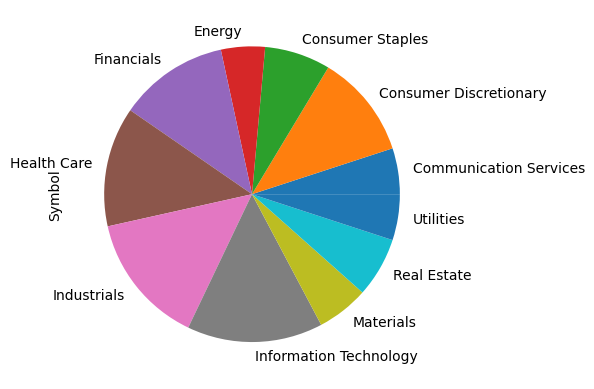

In [68]:
#  Pie chart

distribution = data.groupby("GICS_Sector")[["Symbol"]].nunique()
distribution.plot.pie(subplots=True, legend = False)



In [85]:


data["State"] = data.hq.apply(lambda x: x.split(",")[-1])
states = data.State.value_counts().reset_index()
states.columns = ["State","Dist"]
states.transpose()





,0,1,2,3,4,5,6,7,8,9,...,39,40,41,42,43,44,45,46,47,48
State,California,New York,Texas,Illinois,Pennsylvania,Massachusetts,Ohio,North Carolina,Georgia,New Jersey,...,D.C.,UK,Tennessee,Maine,Iowa,Oregon,Florida,Kingdom of the Netherlands,Israel,Switzerland
Dist,65,44,41,31,19,18,17,16,16,15,...,1,1,1,1,1,1,1,1,1,1


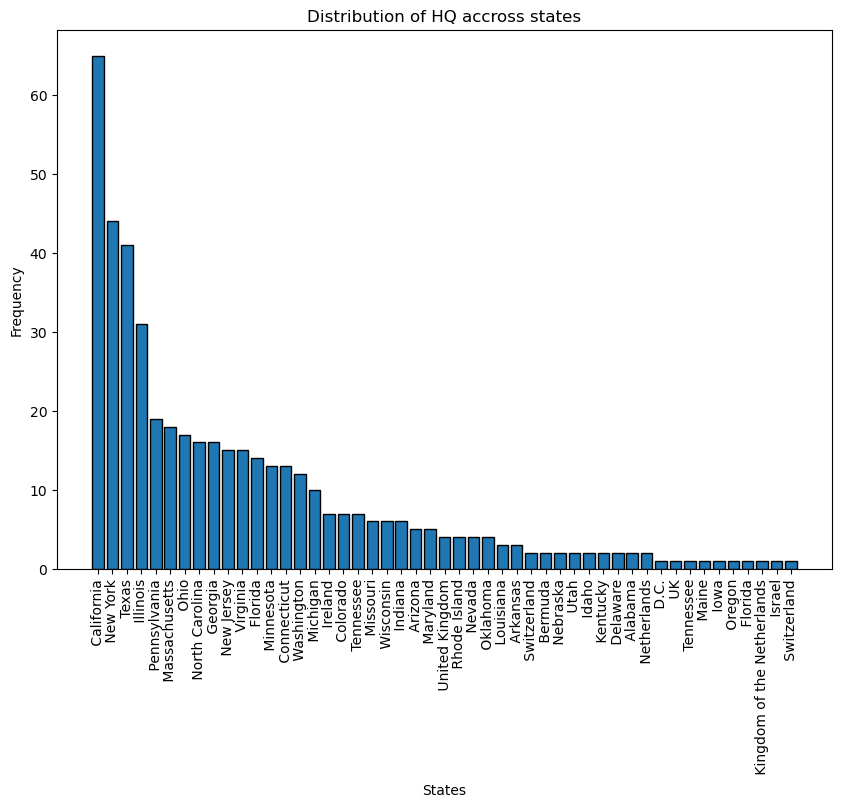

In [89]:
plt.figure(figsize=(10,7))
plt.bar(states.State, states.Dist, edgecolor="black")
plt.title("Distribution of HQ accross states")
plt.xticks(rotation=90)
plt.xlabel("States")
plt.ylabel("Frequency")
plt.show()